# Draugen

In [1]:
# Import modules

import numpy as np
import pandas as pd
import requests
import io
import datetime
from scipy.integrate import solve_ivp
from derivative import dxdt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from scipy.ndimage import median_filter

In [2]:
url = 'https://raw.githubusercontent.com/SanderSondeland/Master/main/20230418_WellBore_monthlyFacility%20(1).csv?token=GHSAT0AAAAAACD4GTTLM35KNNFLKBPUPOWMZEI5SXA'
download = requests.get(url).content
data = pd.read_csv(io.StringIO(download.decode('utf-8')))
data

,name,npdId,field,year,month,operationTime,operationTimeUom,wellStatus,oil,oilUom,gas,gasUom,condensate,condensateUom,water,waterUom
0,6407/9-A-1,2254,DRAUGEN,1994,6,NaN,d,NaN,172347,Sm3,7931000,Sm3,NaN,Sm3,0,Sm3
1,6407/9-A-1,2254,DRAUGEN,1994,7,NaN,d,NaN,198022,Sm3,10221000,Sm3,NaN,Sm3,0,Sm3
2,6407/9-A-1,2254,DRAUGEN,1994,8,NaN,d,NaN,201457,Sm3,11584000,Sm3,NaN,Sm3,0,Sm3
3,6407/9-A-1,2254,DRAUGEN,1994,9,NaN,d,NaN,197711,Sm3,11087000,Sm3,NaN,Sm3,0,Sm3
4,6407/9-A-1,2254,DRAUGEN,1994,10,NaN,d,NaN,195050,Sm3,10988000,Sm3,NaN,Sm3,0,Sm3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3700,6407/9-G-5 H,7715,DRAUGEN,2020,8,31.00,d,producing,8851,Sm3,304029,Sm3,NaN,Sm3,66253,Sm3
3701,6407/9-G-5 H,7715,DRAUGEN,2020,9,28.93,d,producing,8493,Sm3,270559,Sm3,NaN,Sm3,66175,Sm3
3702,6407/9-G-5 H,7715,DRAUGEN,2020,10,25.54,d,producing,7268,Sm3,245919,Sm3,NaN,Sm3,62792,Sm3
3703,6407/9-G-5 H,7715,DRAUGEN,2020,11,30.00,d,producing,8109,Sm3,257430,Sm3,NaN,Sm3,73987,Sm3


In [3]:
data.name.unique()

array(['6407/9-A-1', '6407/9-A-2 A', '6407/9-A-3', '6407/9-A-4',
       '6407/9-A-4 A', '6407/9-A-5', '6407/9-A-53 H', '6407/9-A-55 AH',
       '6407/9-A-6', '6407/9-D-1 AH', '6407/9-D-2 H', '6407/9-D-3 H',
       '6407/9-E-1 H', '6407/9-E-2 H', '6407/9-E-3 H', '6407/9-E-4 H',
       '6407/9-G-1 H', '6407/9-G-2 H', '6407/9-G-3 H', '6407/9-G-5 H'],
      dtype=object)

In [4]:
data1 = data.drop(columns=['npdId', 'field', 'operationTime', 'operationTimeUom','wellStatus','oilUom', 'gasUom', 'condensate',
'condensateUom', 'waterUom'])
data1

,name,year,month,oil,gas,water
0,6407/9-A-1,1994,6,172347,7931000,0
1,6407/9-A-1,1994,7,198022,10221000,0
2,6407/9-A-1,1994,8,201457,11584000,0
3,6407/9-A-1,1994,9,197711,11087000,0
4,6407/9-A-1,1994,10,195050,10988000,0
...,...,...,...,...,...,...
3700,6407/9-G-5 H,2020,8,8851,304029,66253
3701,6407/9-G-5 H,2020,9,8493,270559,66175
3702,6407/9-G-5 H,2020,10,7268,245919,62792
3703,6407/9-G-5 H,2020,11,8109,257430,73987


In [5]:
x_data = data1[data1['name'] == '6407/9-A-1']
x_data.loc[:, 'period'] = x_data['year'].astype(str) + '-' + x_data['month'].astype(str)
x_data.loc[:, 'tot_prod'] = (x_data['oil'] + x_data['gas']/1000).round(1)
x_data = x_data.groupby('period').sum()
x_data

C:\Users\sande\AppData\Local\Temp\ipykernel_16680\3989910507.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_data.loc[:, 'period'] = x_data['year'].astype(str) + '-' + x_data['month'].astype(str)
C:\Users\sande\AppData\Local\Temp\ipykernel_16680\3989910507.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_data.loc[:, 'tot_prod'] = (x_data['oil'] + x_data['gas']/1000).round(1)
C:\Users\sande\AppData\Local\Temp\ipykernel_16680\3989910507.py:4: FutureWarning: The default value of numeric_only in Data

,year,month,oil,gas,water,tot_prod
period,,,,,,
1994-10,1994,10,195050,10988000,0,206038.0
1994-11,1994,11,196044,10255000,0,206299.0
1994-12,1994,12,176032,9252000,0,185284.0
1994-6,1994,6,172347,7931000,0,180278.0
1994-7,1994,7,198022,10221000,0,208243.0
...,...,...,...,...,...,...
2020-5,2020,5,6446,420354,132877,6866.4
2020-6,2020,6,4180,279594,95597,4459.6
2020-7,2020,7,2172,143060,40738,2315.1


In [6]:
y_data = data1[data1['name'] == '6407/9-A-2 A']
y_data.loc[:, 'period'] = y_data['year'].astype(str) + '-' + y_data['month'].astype(str)
y_data.loc[:, 'tot_prod'] = (y_data['oil'] + y_data['gas']/1000).round(1)
y_data.groupby('period').sum()
y_data

C:\Users\sande\AppData\Local\Temp\ipykernel_16680\4226326607.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_data.loc[:, 'period'] = y_data['year'].astype(str) + '-' + y_data['month'].astype(str)
C:\Users\sande\AppData\Local\Temp\ipykernel_16680\4226326607.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_data.loc[:, 'tot_prod'] = (y_data['oil'] + y_data['gas']/1000).round(1)
C:\Users\sande\AppData\Local\Temp\ipykernel_16680\4226326607.py:4: FutureWarning: The default value of numeric_only in Data

,name,year,month,oil,gas,water,period,tot_prod
318,6407/9-A-2 A,1994,12,72310,3802000,0,1994-12,76112.0
319,6407/9-A-2 A,1995,1,107169,5585000,0,1995-1,112754.0
320,6407/9-A-2 A,1995,2,137400,7487000,0,1995-2,144887.0
321,6407/9-A-2 A,1995,3,128699,7202000,0,1995-3,135901.0
322,6407/9-A-2 A,1995,4,142063,7908000,0,1995-4,149971.0
...,...,...,...,...,...,...,...,...
625,6407/9-A-2 A,2020,8,5055,287806,164523,2020-8,5342.8
626,6407/9-A-2 A,2020,9,6422,336610,162410,2020-9,6758.6
627,6407/9-A-2 A,2020,10,6954,381451,171507,2020-10,7335.5
628,6407/9-A-2 A,2020,11,6040,315625,157900,2020-11,6355.6


In [7]:
z_data = data1[data1['name'] == '6407/9-A-6']
z_data.loc[:, 'period'] = z_data['year'].astype(str) + '-' + z_data['month'].astype(str)
z_data.loc[:, 'tot_prod'] = (z_data['oil'] + z_data['gas']/1000).round(1)
z_data.groupby('period').sum()
z_data

C:\Users\sande\AppData\Local\Temp\ipykernel_16680\2187305751.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z_data.loc[:, 'period'] = z_data['year'].astype(str) + '-' + z_data['month'].astype(str)
C:\Users\sande\AppData\Local\Temp\ipykernel_16680\2187305751.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z_data.loc[:, 'tot_prod'] = (z_data['oil'] + z_data['gas']/1000).round(1)
C:\Users\sande\AppData\Local\Temp\ipykernel_16680\2187305751.py:4: FutureWarning: The default value of numeric_only in Data

,name,year,month,oil,gas,water,period,tot_prod
1897,6407/9-A-6,1994,8,206901,11608000,0,1994-8,218509.0
1898,6407/9-A-6,1994,9,215894,12106000,0,1994-9,228000.0
1899,6407/9-A-6,1994,10,221972,12504000,0,1994-10,234476.0
1900,6407/9-A-6,1994,11,211153,11045000,0,1994-11,222198.0
1901,6407/9-A-6,1994,12,220564,11594000,0,1994-12,232158.0
...,...,...,...,...,...,...,...,...
2208,6407/9-A-6,2020,8,14463,815989,173401,2020-8,15279.0
2209,6407/9-A-6,2020,9,15132,791996,166646,2020-9,15924.0
2210,6407/9-A-6,2020,10,15493,2185778,162246,2020-10,17678.8
2211,6407/9-A-6,2020,11,13065,2184933,156661,2020-11,15249.9


In [8]:
dates = [datetime.datetime(year=int(year), month=int(month), day=1) for year in range(1994, 2021) for month in range(1, 13)]
dates = dates[11:-3]

In [9]:
test_x = x_data[8:]
tot_prod_x = test_x['tot_prod']

test_y = y_data[:-2]
tot_prod_y = test_y['tot_prod']


test_z = z_data[4:-2]
tot_prod_z = test_z['tot_prod']

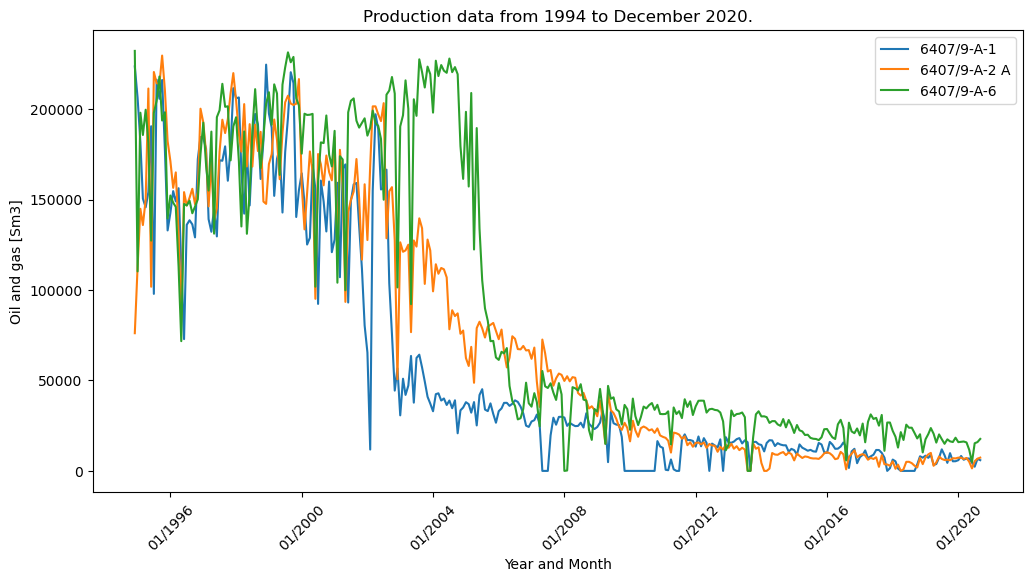

In [10]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(dates, tot_prod_x, label='6407/9-A-1')
ax.plot(dates, tot_prod_y, label='6407/9-A-2 A')
ax.plot(dates, tot_prod_z, label='6407/9-A-6')

date_fmt = mdates.DateFormatter('%m/%Y')
ax.xaxis.set_major_formatter(date_fmt)
plt.xticks(rotation=45)

# Set plot title and axis labels
plt.title('Production data from 1994 to December 2020.')
plt.legend()
plt.xlabel('Year and Month')
plt.ylabel('Oil and gas [Sm3]')

plt.show()

# Filtering


In [11]:
md_x = median_filter(tot_prod_x, size=4)

md_y = median_filter(tot_prod_y, size=4)

md_z = median_filter(tot_prod_z, size=4)

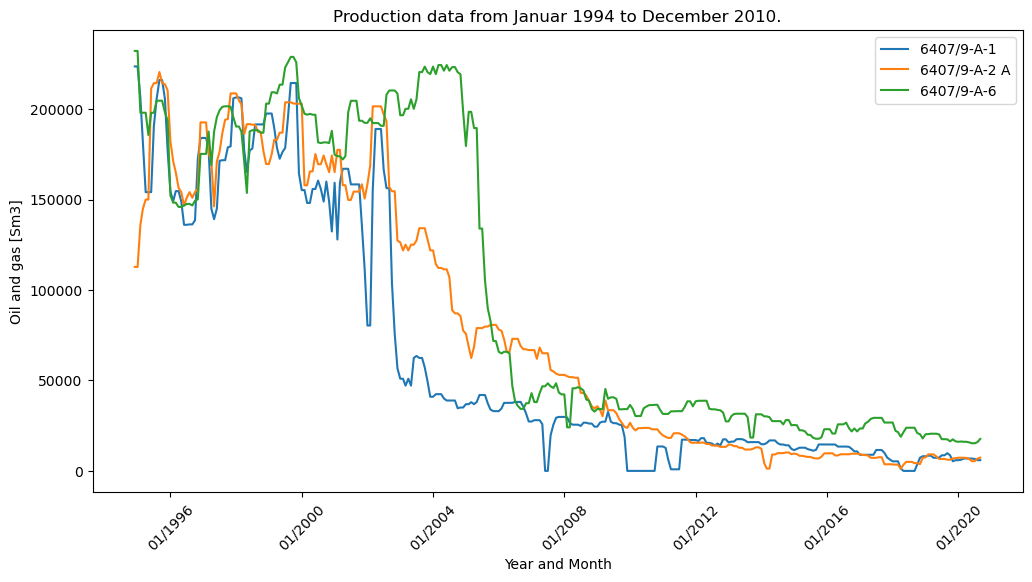

In [12]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(dates, md_x, label='6407/9-A-1')
ax.plot(dates, md_y, label='6407/9-A-2 A')
ax.plot(dates, md_z, label='6407/9-A-6')

date_fmt = mdates.DateFormatter('%m/%Y')
ax.xaxis.set_major_formatter(date_fmt)
plt.xticks(rotation=45)

# Set plot title and axis labels
plt.title('Production data from Januar 1994 to December 2010.')
plt.legend()
plt.xlabel('Year and Month')
plt.ylabel('Oil and gas [Sm3]')

plt.show()

In [13]:
i = len(dates)
t = list(range(1, i+1))
t_np = np.array(t)

In [14]:
md_x_np = np.array(md_x)
md_y_np = np.array(md_y)
md_z_np = np.array(md_z)

tot_prod_x_np = np.array(tot_prod_x)
tot_prod_y_np = np.array(tot_prod_y)
tot_prod_z_np = np.array(tot_prod_z)

In [15]:
x_der = dxdt(md_x_np, t_np, kind="kalman", alpha=2)
y_der = dxdt(md_y_np, t_np, kind="kalman", alpha=2)
z_der = dxdt(md_z_np, t_np, kind="kalman", alpha=2)

In [16]:
x_der2 = dxdt(md_x_np, t_np, kind="finite_difference", k=2)
y_der2 = dxdt(md_y_np, t_np, kind="finite_difference", k=2)
z_der2 = dxdt(md_z_np, t_np, kind="finite_difference", k=2)

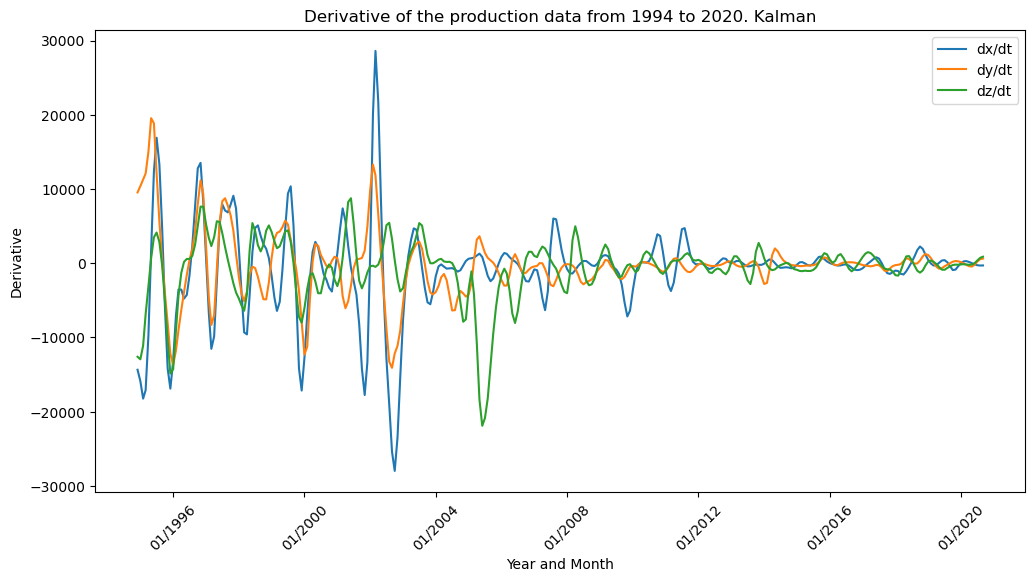

In [19]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(dates, x_der, label='dx/dt')
ax.plot(dates, y_der, label='dy/dt')
ax.plot(dates, z_der, label='dz/dt')

date_fmt = mdates.DateFormatter('%m/%Y')
ax.xaxis.set_major_formatter(date_fmt)
plt.xticks(rotation=45)

# Set plot title and axis labels
plt.title('Derivative of the production data from 1994 to 2020. Kalman')
plt.legend()
plt.xlabel('Year and Month')
plt.ylabel('Derivative')

plt.show()

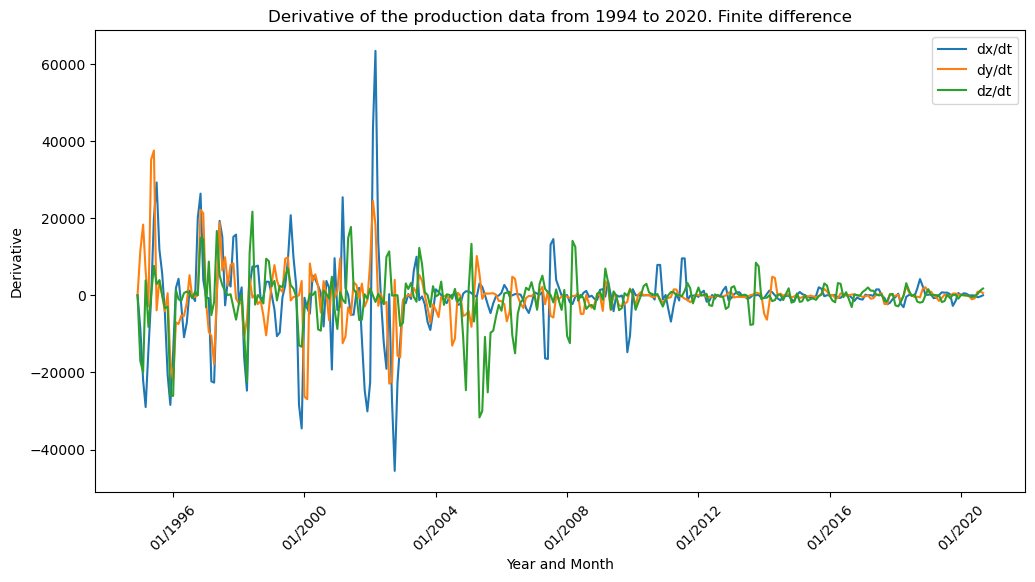

In [21]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(dates, x_der2, label='dx/dt')
ax.plot(dates, y_der2, label='dy/dt')
ax.plot(dates, z_der2, label='dz/dt')

date_fmt = mdates.DateFormatter('%m/%Y')
ax.xaxis.set_major_formatter(date_fmt)
plt.xticks(rotation=45)

# Set plot title and axis labels
plt.title('Derivative of the production data from 1994 to 2020. Finite difference')
plt.legend()
plt.xlabel('Year and Month')
plt.ylabel('Derivative')

plt.show()

# SINDy

In [20]:
mat = np.zeros((310,3))

mat[:, 0] = md_x
mat[:, 1] = md_y
mat[:, 2] = md_z

mat.shape

(310, 3)

In [21]:
mat_der = np.zeros((310,3))

mat_der[:, 0] = x_der
mat_der[:, 1] = y_der
mat_der[:, 2] = z_der

mat_der.shape

(310, 3)

In [22]:
def create_library(u: np.ndarray, polynomial_order: int,
                   use_trig: bool, use_exp: bool) -> np.ndarray:
    """Creates a matrix containing a library of candidate functions.
    """
    (m, n) = u.shape
    theta = np.ones((m, 1))

    # Polynomials of order 1.
    theta = np.hstack((theta, u))

    # Polynomials of order 2.
    if polynomial_order >= 2:
        for i in range(n):
            for j in range(i, n):
                theta = np.hstack((theta, u[:, i:i + 1] * u[:, j:j + 1]))

    # Polynomials of order 3.
    if polynomial_order >= 3:
        for i in range(n):
            for j in range(i, n):
                for k in range(j, n):
                    theta = np.hstack(
                        (theta, u[:, i:i + 1] * u[:, j:j + 1] * u[:, k:k + 1]))

    # Polynomials of order 4.
    if polynomial_order >= 4:
        for i in range(n):
            for j in range(i, n):
                for k in range(j, n):
                    for l in range(k, n):
                        theta = np.hstack(
                            (theta, u[:, i:i + 1] * u[:, j:j + 1] *
                             u[:, k:k + 1] * u[:, l:l + 1]))

    # Polynomials of order 5.
    if polynomial_order >= 5:
        for i in range(n):
            for j in range(i, n):
                for k in range(j, n):
                    for l in range(k, n):
                        for m in range(l, n):
                            theta = np.hstack(
                                (theta, u[:, i:i + 1] * u[:, j:j + 1] *
                                 u[:, k:k + 1] * u[:, l:l + 1] * u[:, m:m + 1]))

    if use_trig:
        for i in range(1, 11):
            theta = np.hstack((theta, np.sin(i * u), np.cos(i * u)))

    if use_exp:
        for i in range(n):
            theta = np.hstack((theta, np.exp(-u[:, i:i+1]), np.exp(-u[:, i:i+1]**2)))

    return theta

In [23]:
def approximation(_: float, u: np.ndarray, xi: np.ndarray,
                         polynomial_order: int, use_trig: bool, use_exp: bool) -> np.ndarray:
    theta = create_library(u.reshape((1, 3)), polynomial_order, use_trig, use_exp)
    return theta @ xi

def compute_trajectory(u0: np.ndarray, xi: np.ndarray, polynomial_order: int,
                       use_trig: bool, use_exp: bool) -> np.ndarray:
    t0 = 0
    dt = 1
    tmax = 310
    n = int(tmax / dt + 1)

    t = np.linspace(start=t0, stop=tmax, num=n)
    result = solve_ivp(fun=approximation,
                       t_span=(t0, tmax),
                       y0=u0,
                       t_eval=t,
                       args=(xi, polynomial_order, use_trig, use_exp))
    u = result.y.T

    return u

In [24]:
def calculate_regression(theta: np.ndarray, uprime: np.ndarray,
                         threshold: float, max_iterations: int) -> np.ndarray:
    # Solve theta * xi = uprime in the least-squares sense.
    xi = np.linalg.lstsq(theta, uprime, rcond=None)[0]
    n = xi.shape[1]

    # Add sparsity.
    for _ in range(max_iterations):
        small_indices = np.abs(xi) < threshold
        xi[small_indices] = 0
        for j in range(n):
            big_indices = np.logical_not(small_indices[:, j])
            xi[big_indices, j] = np.linalg.lstsq(theta[:, big_indices],
                                                 uprime[:, j],
                                                 rcond=None)[0]
            
    return xi


In [25]:
POLYNOMIAL_ORDER = 2
USE_TRIG = False
USE_EXP = False
T_ORDER = 1

t_np_test = np.array(range(1, 311))

theta = create_library(mat, POLYNOMIAL_ORDER, USE_TRIG, USE_EXP)
theta.size

3100

In [26]:
THRESHOLD = 0.005
MAX_ITERATIONS = 10

xi = calculate_regression(theta, mat_der, THRESHOLD, MAX_ITERATIONS)
xi

(10, 3)


array([[ 9.96159839e+01, -2.73130752e+02, -3.83454240e+02],
       [-3.22382027e-02,  3.70187759e-02,  0.00000000e+00],
       [ 5.87360444e-02, -3.82739125e-02,  1.90176817e-02],
       [-3.43451987e-02,  5.79877812e-03, -1.86472767e-02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [27]:
mat_0 = mat[0]

u_approximation = compute_trajectory(mat_0, xi, POLYNOMIAL_ORDER, USE_TRIG, USE_EXP)
x_aprox = u_approximation[:,0]
y_aprox = u_approximation[:,1]
z_aprox = u_approximation[:,2]

(311, 3)


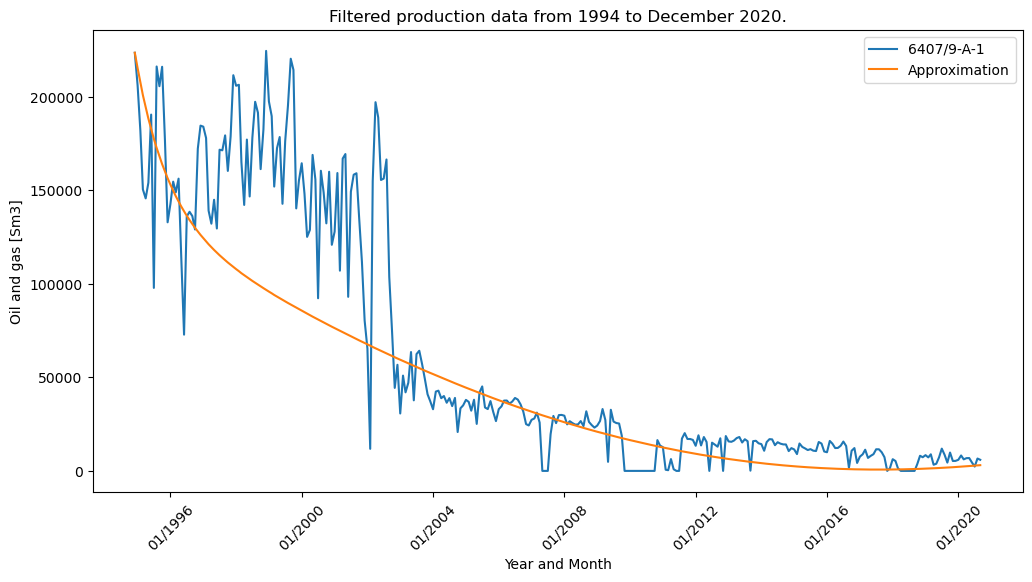

In [28]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(dates, tot_prod_x, label='6407/9-A-1')
ax.plot(dates, x_aprox[:-1], label='Approximation')


date_fmt = mdates.DateFormatter('%m/%Y')
ax.xaxis.set_major_formatter(date_fmt)
plt.xticks(rotation=45)

# Set plot title and axis labels
plt.title('Filtered production data from 1994 to December 2020.')
plt.legend()
plt.xlabel('Year and Month')
plt.ylabel('Oil and gas [Sm3]')

plt.show()

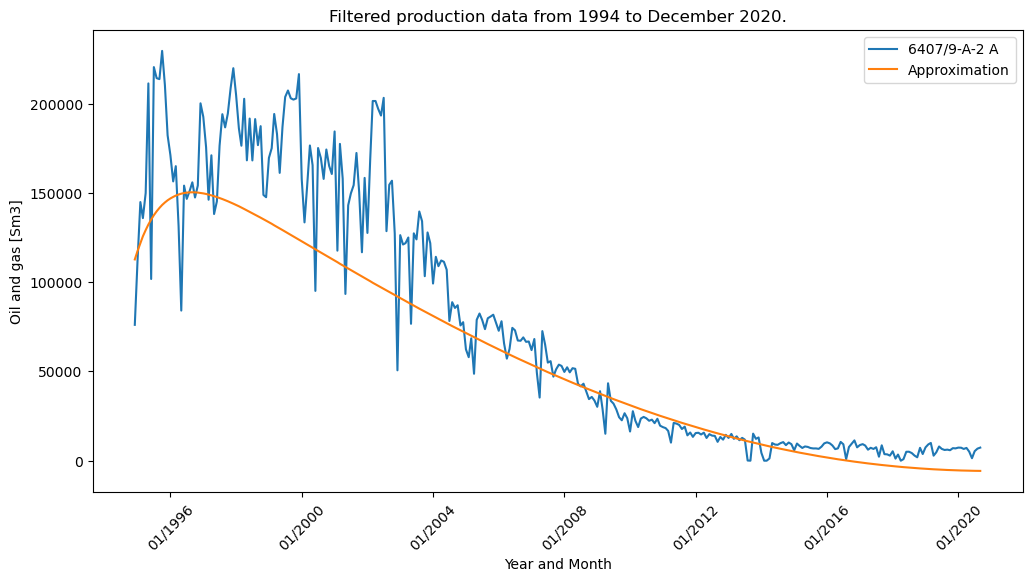

In [29]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(dates, tot_prod_y, label='6407/9-A-2 A')
ax.plot(dates, y_aprox[:-1], label='Approximation')


date_fmt = mdates.DateFormatter('%m/%Y')
ax.xaxis.set_major_formatter(date_fmt)
plt.xticks(rotation=45)

# Set plot title and axis labels
plt.title('Filtered production data from 1994 to December 2020.')
plt.legend()
plt.xlabel('Year and Month')
plt.ylabel('Oil and gas [Sm3]')

plt.show()

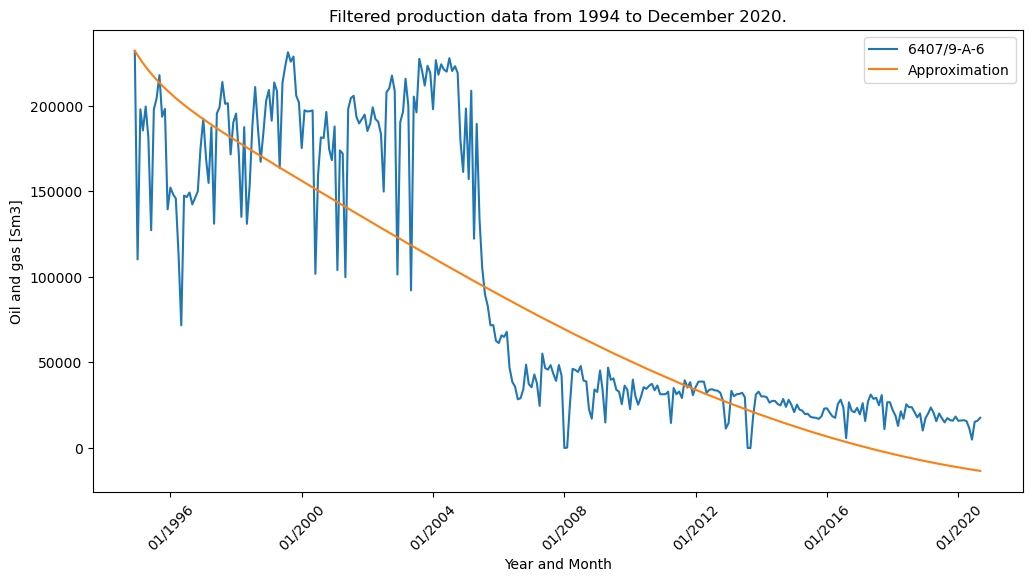

In [30]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(dates, tot_prod_z, label='6407/9-A-6')
ax.plot(dates, z_aprox[:-1], label='Approximation')


date_fmt = mdates.DateFormatter('%m/%Y')
ax.xaxis.set_major_formatter(date_fmt)
plt.xticks(rotation=45)

# Set plot title and axis labels
plt.title('Filtered production data from 1994 to December 2020.')
plt.legend()
plt.xlabel('Year and Month')
plt.ylabel('Oil and gas [Sm3]')

plt.show()